In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/clinicaltrial_data.csv"
clinical_trial_data_to_load = "data/mouse_drug_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug  = pd.read_csv(mouse_drug_data_to_load)
clinical_trial = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
mouse_df = pd.merge(mouse_drug, clinical_trial, on="Mouse ID")

# Display the data table for preview
mouse_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [2]:
# Establishes different y-axes per drugs as list so that plot can them by indices
drugs = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]


# Established common Groupby to be used by other metrics
drug_time_grp = mouse_df.groupby(["Drug","Timepoint"])


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
vol_mean_df = pd.DataFrame(drug_time_grp["Tumor Volume (mm3)"].mean())
vol_mean_df.rename(columns={"Tumor Volume (mm3)":"Mean Tumor Voume(mm3)"},inplace=True)

# Preview DataFrame
vol_mean_df

Mean Tumor Voume(mm3)
Drug      Timepoint                       
Capomulin 0                      45.000000
          5                      44.266086
          10                     43.084291
          15                     42.064317
          20                     40.716325
          25                     39.939528
          30                     38.769339
          35                     37.816839
          40                     36.958001
          45                     36.236114
Ceftamin  0                      45.000000
          5                      46.503051
          10                     48.285125
          15                     50.094055
          20                     52.157049
          25                     54.287674
          30                     56.769517
          35                     58.827548
          40                     61.467895
          45                     64.132421
Infubinol 0                      45.000000
          5                      47.062001
          10                     49.403909
          15                     51.296397
          20                     53.197691
          25                     55.715252
          30                     58.299397
          35                     60.742461
          40                     63.162824
          45                     65.755562
...                                    ...
Ramicane  0                      45.000000
          5                      43.944859
          10                     42.531957
          15                     41.495061
          20                     40.238325
          25                     38.974300
          30                     38.703137
          35                     37.451996
          40                     36.574081
          45                     34.955595
Stelasyn  0                      45.000000
          5                      47.527452
          10                     49.463844
          15                     51.529409
          20                     54.067395
          25                     56.166123
          30                     59.826738
          35                     62.440699
          40                     65.356386
          45                     68.438310
Zoniferol 0                      45.000000
          5                      46.851818
          10                     48.689881
          15                     50.779059
          20                     53.170334
          25                     55.432935
          30                     57.713531
          35                     60.089372
          40                     62.916692
          45                     65.960888

[100 rows x 1 columns]

In [4]:
# Create dictionary to match a list of means to each drug. 
# The list can be passed to a plot vs a dataframe column
vol_mean_dict = {}
for drug in drugs:
    y_axis = vol_mean_df.ix[drug]["Mean Tumor Voume(mm3)"].tolist()
    vol_mean_dict.update({drug:y_axis})
    
vol_mean_dict

{'Capomulin': [45.0,
  44.26608641544399,
  43.08429058188399,
  42.0643173468125,
  40.71632532212173,
  39.939527826868186,
  38.76933928855454,
  37.81683888251364,
  36.958000810895236,
  36.23611379944763],
 'Infubinol': [45.0,
  47.06200103308799,
  49.40390857087143,
  51.296396556333335,
  53.19769093423,
  55.71525236228889,
  58.29939720909999,
  60.74246122592499,
  63.16282442327,
  65.75556227753333],
 'Ketapril': [45.0,
  47.38917452114347,
  49.582268974622714,
  52.39997374321579,
  54.92093473734737,
  57.678981717731574,
  60.99450719306666,
  63.37168604566471,
  66.06858034917335,
  70.66295760897272],
 'Placebo': [45.0,
  47.12558918843749,
  49.42332947868749,
  51.35974169802999,
  54.36441702681052,
  57.48257374394706,
  59.80906318567333,
  62.420615067964285,
  65.05267500425833,
  68.08408221741819]}

In [5]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

vol_sem_df = pd.DataFrame(drug_time_grp["Tumor Volume (mm3)"].sem())
vol_sem_df.rename(columns={"Tumor Volume (mm3)":"Tumor Voume SEM (mm3)"},inplace=True)

# Preview DataFrame
vol_sem_df

vol_sem_dict = {}
for drug in drugs:
    y_axis = vol_sem_df.ix[drug]["Tumor Voume SEM (mm3)"].tolist()
    vol_sem_dict.update({drug:y_axis})
    
vol_sem_dict

{'Capomulin': [0.0,
  0.4485928502010375,
  0.7026843745238929,
  0.8386172472985693,
  0.9097306924832058,
  0.8816421535181785,
  0.9344595100287,
  1.0522408935958147,
  1.2236083945982943,
  1.2239774547199704],
 'Infubinol': [0.0,
  0.23510230430767534,
  0.2823459146215714,
  0.3577050049753906,
  0.4762095134790836,
  0.5503145721542003,
  0.6310610824580497,
  0.9841549374017833,
  1.0552196467136108,
  1.144427383453774],
 'Ketapril': [0.0,
  0.2648185201672865,
  0.3574212563721371,
  0.5802679659678781,
  0.7264838239834724,
  0.7554127528910384,
  0.9341208698545584,
  1.1278671755166148,
  1.1584488850099,
  1.4531864758425812],
 'Placebo': [0.0,
  0.21809078325219491,
  0.40206380730509256,
  0.6144614435805993,
  0.8396091719248748,
  1.0348719877946384,
  1.2182311773334498,
  1.2874806023058396,
  1.3706340409784523,
  1.3517255953502074]}

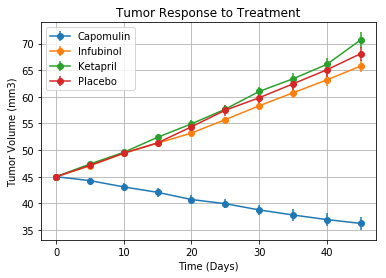

In [6]:
# Establishes x-axis, which is(are?) the timepoints
x_axis = mouse_df["Timepoint"].unique()

# Generate the Plot (with Error Bars). Automates so if you wanted to look at different drugs, 
# you only have to change in the drug list
fig, axis = plt.subplots()    
for drug in drugs:
    plt.errorbar(x_axis,vol_mean_dict[drug],vol_sem_dict[drug],marker="o",label=drug)
    plt.legend(loc="upper left")
    
# FORMAT AND PRETTY
plt.grid()
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")

# Show the Figure
plt.show()



In [7]:
# Save the Figure
plt.savefig("Drug SEM.jpg")

<Figure size 432x288 with 0 Axes>

## Metastatic Response to Treatment

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
# Convert to DataFrame
mean_met_df = pd.DataFrame(drug_time_grp["Metastatic Sites"].mean())

# Preview DataFrame
mean_met_df.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [9]:
# Lists of y-axes to pass to plot
mean_met_dict = {}
for drug in drugs:
    y_axis = mean_met_df.ix[drug]["Metastatic Sites"].tolist()
    mean_met_dict.update({drug:y_axis})
    
mean_met_dict

{'Capomulin': [0.0,
  0.16,
  0.32,
  0.375,
  0.6521739130434783,
  0.8181818181818182,
  1.0909090909090908,
  1.1818181818181819,
  1.380952380952381,
  1.4761904761904763],
 'Infubinol': [0.0,
  0.28,
  0.6666666666666666,
  0.9047619047619048,
  1.05,
  1.2777777777777777,
  1.588235294117647,
  1.6666666666666667,
  2.1,
  2.111111111111111],
 'Ketapril': [0.0,
  0.30434782608695654,
  0.5909090909090909,
  0.8421052631578947,
  1.2105263157894737,
  1.631578947368421,
  2.0555555555555554,
  2.2941176470588234,
  2.7333333333333334,
  3.3636363636363638],
 'Placebo': [0.0,
  0.375,
  0.8333333333333334,
  1.25,
  1.5263157894736843,
  1.9411764705882353,
  2.2666666666666666,
  2.642857142857143,
  3.1666666666666665,
  3.272727272727273]}

In [10]:
# Dataframe for grouped SEM calculations
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
sem_met_df = pd.DataFrame(drug_time_grp["Metastatic Sites"].sem())

# Convert to DataFrame
sem_met_df.rename(columns={"Metastatic Sites":"Metastatic Sites SEM"},inplace=True)

# Preview DataFrame
sem_met_df.head()

Metastatic Sites SEM
Drug      Timepoint                      
Capomulin 0                      0.000000
          5                      0.074833
          10                     0.125433
          15                     0.132048
          20                     0.161621

In [11]:
# List of SEM to pass to plot
sem_met_dict = {}
for drug in drugs:
    y_axis = sem_met_df.ix[drug]["Metastatic Sites SEM"].tolist()
    sem_met_dict.update({drug:y_axis})
    
sem_met_dict

{'Capomulin': [0.0,
  0.07483314773547882,
  0.1254325848148452,
  0.13204769669668062,
  0.16162093517992787,
  0.18181818181818182,
  0.17294358749297126,
  0.16949586104287354,
  0.1756103706151026,
  0.20259092748745378],
 'Infubinol': [0.0,
  0.09165151389911681,
  0.15936381457791915,
  0.19401475035679397,
  0.23480114767046692,
  0.26575279135832647,
  0.22782254977690689,
  0.2247332874877474,
  0.31446603773522014,
  0.30932024237944566],
 'Ketapril': [0.0,
  0.0981001869248289,
  0.14201839569111904,
  0.1913809142918546,
  0.23667960637249194,
  0.28827503026587686,
  0.3474672338172563,
  0.3614178155130737,
  0.31572541817620525,
  0.2787219948501071],
 'Placebo': [0.0,
  0.10094660663590603,
  0.11526067913468747,
  0.1902214775631705,
  0.23406428182677771,
  0.2638876241900936,
  0.30026443372256084,
  0.3414117886352963,
  0.2972941950052816,
  0.30424000964875475]}

In [12]:
# Minor Data Munging to Re-Format the Data Frames
vol_mean_df2 = vol_mean_df.unstack(level=0)

# Preview that Reformatting worked
vol_mean_df2

Mean Tumor Voume(mm3)                                              \
Drug                  Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                                     
0                     45.000000  45.000000  45.000000  45.000000  45.000000   
5                     44.266086  46.503051  47.062001  47.389175  46.796098   
10                    43.084291  48.285125  49.403909  49.582269  48.694210   
15                    42.064317  50.094055  51.296397  52.399974  50.933018   
20                    40.716325  52.157049  53.197691  54.920935  53.644087   
25                    39.939528  54.287674  55.715252  57.678982  56.731968   
30                    38.769339  56.769517  58.299397  60.994507  59.559509   
35                    37.816839  58.827548  60.742461  63.371686  62.685087   
40                    36.958001  61.467895  63.162824  66.068580  65.600754   
45                    36.236114  64.132421  65.755562  70.662958  69.265506   

                                                                  
Drug         Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                                         
0          45.000000  45.000000  45.000000  45.000000  45.000000  
5          47.125589  47.248967  43.944859  47.527452  46.851818  
10         49.423329  49.101541  42.531957  49.463844  48.689881  
15         51.359742  51.067318  41.495061  51.529409  50.779059  
20         54.364417  53.346737  40.238325  54.067395  53.170334  
25         57.482574  55.504138  38.974300  56.166123  55.432935  
30         59.809063  58.196374  38.703137  59.826738  57.713531  
35         62.420615  60.350199  37.451996  62.440699  60.089372  
40         65.052675  63.045537  36.574081  65.356386  62.916692  
45         68.084082  66.258529  34.955595  68.438310  65.960888

In [13]:
# Minor Data Munging to Re-Format the Data Frames
mean_met_df2 = mean_met_df.unstack(level=0)

# Preview that Reformatting worked
mean_met_df2

Metastatic Sites                                                    \
Drug             Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                      
0                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                 0.160000  0.380952  0.280000  0.304348  0.260870  0.375000   
10                0.320000  0.600000  0.666667  0.590909  0.523810  0.833333   
15                0.375000  0.789474  0.904762  0.842105  0.857143  1.250000   
20                0.652174  1.111111  1.050000  1.210526  1.150000  1.526316   
25                0.818182  1.500000  1.277778  1.631579  1.500000  1.941176   
30                1.090909  1.937500  1.588235  2.055556  2.066667  2.266667   
35                1.181818  2.071429  1.666667  2.294118  2.266667  2.642857   
40                1.380952  2.357143  2.100000  2.733333  2.466667  3.166667   
45                1.476190  2.692308  2.111111  3.363636  2.538462  3.272727   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.320000  0.120000  0.240000  0.166667  
10         0.565217  0.250000  0.478261  0.500000  
15         0.764706  0.333333  0.782609  0.809524  
20         1.000000  0.347826  0.952381  1.294118  
25         1.357143  0.652174  1.157895  1.687500  
30         1.615385  0.782609  1.388889  1.933333  
35         2.300000  0.952381  1.562500  2.285714  
40         2.777778  1.100000  1.583333  2.785714  
45         2.571429  1.250000  1.727273  3.071429

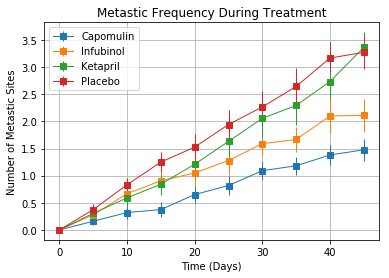

In [14]:
# Generate the Plot (with Error Bars)
fig, axis = plt.subplots()    
for drug in drugs:
    plt.errorbar(x_axis,mean_met_dict[drug],sem_met_dict[drug],marker="s",label=drug, linewidth=1)
    plt.legend(loc="upper left")


#Establishes x-axis, which is(are?) the timepoints
plt.grid()
plt.title("Metastic Frequency During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Number of Metastic Sites")

# Show the Figure
plt.show()

In [15]:
# Save the Figure
plt.savefig("Drug Metastic.jpg")

<Figure size 432x288 with 0 Axes>

## Survival Rates

In [16]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame
mouse_count = pd.DataFrame(drug_time_grp["Mouse ID"].count())
mouse_count.rename(columns={"Mouse ID":"Mice Alive"},inplace=True)

# Preview DataFrame
mouse_count.head()

Mice Alive
Drug      Timepoint            
Capomulin 0                  25
          5                  25
          10                 25
          15                 24
          20                 23

In [17]:
# Minor Data Munging to Re-Format the Data Frames
mouse_count2 = mouse_count.unstack(level=0)

# Preview the Data Frame
mouse_count2

Mice Alive                                                        \
Drug       Capomulin Ceftamin Infubinol Ketapril Naftisol Placebo Propriva   
Timepoint                                                                    
0                 25       25        25       25       25      25       26   
5                 25       21        25       23       23      24       25   
10                25       20        21       22       21      24       23   
15                24       19        21       19       21      20       17   
20                23       18        20       19       20      19       17   
25                22       18        18       19       18      17       14   
30                22       16        17       18       15      15       13   
35                22       14        12       17       15      14       10   
40                21       14        10       15       15      12        9   
45                21       13         9       11       13      11        7   

                                       
Drug      Ramicane Stelasyn Zoniferol  
Timepoint                              
0               25       26        25  
5               25       25        24  
10              24       23        22  
15              24       23        21  
20              23       21        17  
25              23       19        16  
30              23       18        15  
35              21       16        14  
40              20       12        14  
45              20       11        14

In [18]:
# List of y-axis to pass to plot
count_mouse_dict = {}

for drug in drugs:
    y_axis = mouse_count.ix[drug]["Mice Alive"].tolist()
    count_mouse_dict.update({drug:y_axis})
    
count_mouse_dict

{'Capomulin': [25, 25, 25, 24, 23, 22, 22, 22, 21, 21],
 'Infubinol': [25, 25, 21, 21, 20, 18, 17, 12, 10, 9],
 'Ketapril': [25, 23, 22, 19, 19, 19, 18, 17, 15, 11],
 'Placebo': [25, 24, 24, 20, 19, 17, 15, 14, 12, 11]}

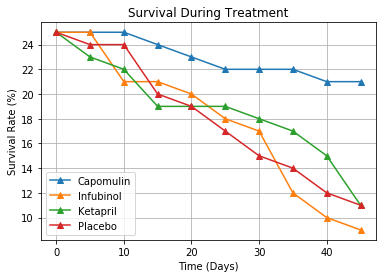

In [19]:
# Generate the Plot (Accounting for percentages)
#___ WHAT DOES THAT MEAN ACCOUNTING FOR PERCENTAGES
fig, axis = plt.subplots()    
for drug in drugs:
    plt.plot(x_axis,count_mouse_dict[drug],marker="^",label=drug,)
    plt.legend(loc="lower left")


#Establishes x-axis, which is(are?) the timepoints
plt.grid()
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")

# Show the Figure
plt.show()


In [20]:
# Save the Figure
plt.savefig("Survival Rate.jpg")

<Figure size 432x288 with 0 Axes>

## Summary Bar Graph

In [21]:
# Calculate the percent changes for each drug
vol_change_list = []

vol_change_list.append((vol_mean_df2.iloc[-1][0]/vol_mean_df2.iloc[0][0]-1)*100)
vol_change_list.append((vol_mean_df2.iloc[-1][2]/vol_mean_df2.iloc[0][2]-1)*100)
vol_change_list.append((vol_mean_df2.iloc[-1][3]/vol_mean_df2.iloc[0][3]-1)*100)
vol_change_list.append((vol_mean_df2.iloc[-1][5]/vol_mean_df2.iloc[0][5]-1)*100)

#Convert list to Array so that I can actually do things to it like conditional formatting and iteration
vol_change_arr = np.array(vol_change_list)
vol_change_arr = np.round(vol_change_arr,2)

# Display the data to confirm
vol_change_arr

array([-19.48,  46.12,  57.03,  51.3 ])

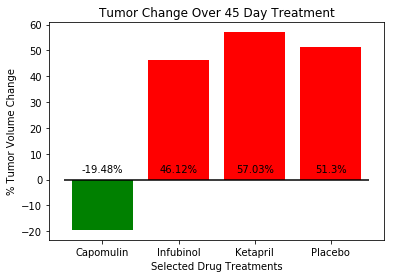

In [26]:

## Conditional color change
cond_color = np.where(vol_change_arr>=0,'red', 'green')

axis1 = plt.bar(drugs,vol_change_arr,align="center",color=cond_color)
plt.title("Tumor Change Over 45 Day Treatment")
plt.xlabel("Selected Drug Treatments")
plt.ylabel("% Tumor Volume Change")
plt.hlines(y=0, xmin=-.5, xmax=3.5, color='k')
# Would like to automate this part, but ran out of time
plt.text(0,3,str(vol_change_arr[0])+"%", horizontalalignment='center')
plt.text(1,3,str(vol_change_arr[1])+"%", horizontalalignment='center')
plt.text(2,3,str(vol_change_arr[2])+"%", horizontalalignment='center')
plt.text(3,3,str(vol_change_arr[3])+"%", horizontalalignment='center')

# Show the Figure
plt.show()

In [23]:
# Save the Figure
plt.savefig("Tumor Change.jpg")

<Figure size 432x288 with 0 Axes>